In [1]:
# Importing the Necessary Libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import scipy.stats as stats
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Reading the Data as a Dataframe
bank = pd.read_csv('F:\Python\Assignment 3/bank-full.csv', sep = ',')

In [3]:
# Basic EDA
# displaying the dataframe.
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
# after displaying the above data of our dataframe it is clear that 45211 row and 17 columns.

In [5]:
# Shape Of our Dataframe.
bank.shape

(45211, 17)

In [6]:
# The shape of the data is clear form the above command.

In [7]:
# The basic datatypes of the dataframe.
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [8]:
# detailed discription of our dataframe.
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
# Check for missing values.
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [10]:
# From above it is clear that there are no missing values present in our dataframe.

In [11]:
bank.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

In [12]:
# This will display the boolean result for missing datatype.

In [13]:
# 5 point Summary of all numerical Datatypes.
bank.describe(include = "all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [14]:
#No of distinct observations 

bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [15]:
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')

In [16]:
for feature in bank.columns: # Loop through all columns in the dataframe
    if bank[feature].dtype == 'object': # Only apply for columns with categorical strings
        bank[feature] = pd.Categorical(bank[feature]).codes # Replace strings with an integer

In [17]:
bank.groupby("Target").count()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
Target,,,,,,,,,,,,,,,,
0,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922,39922
1,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


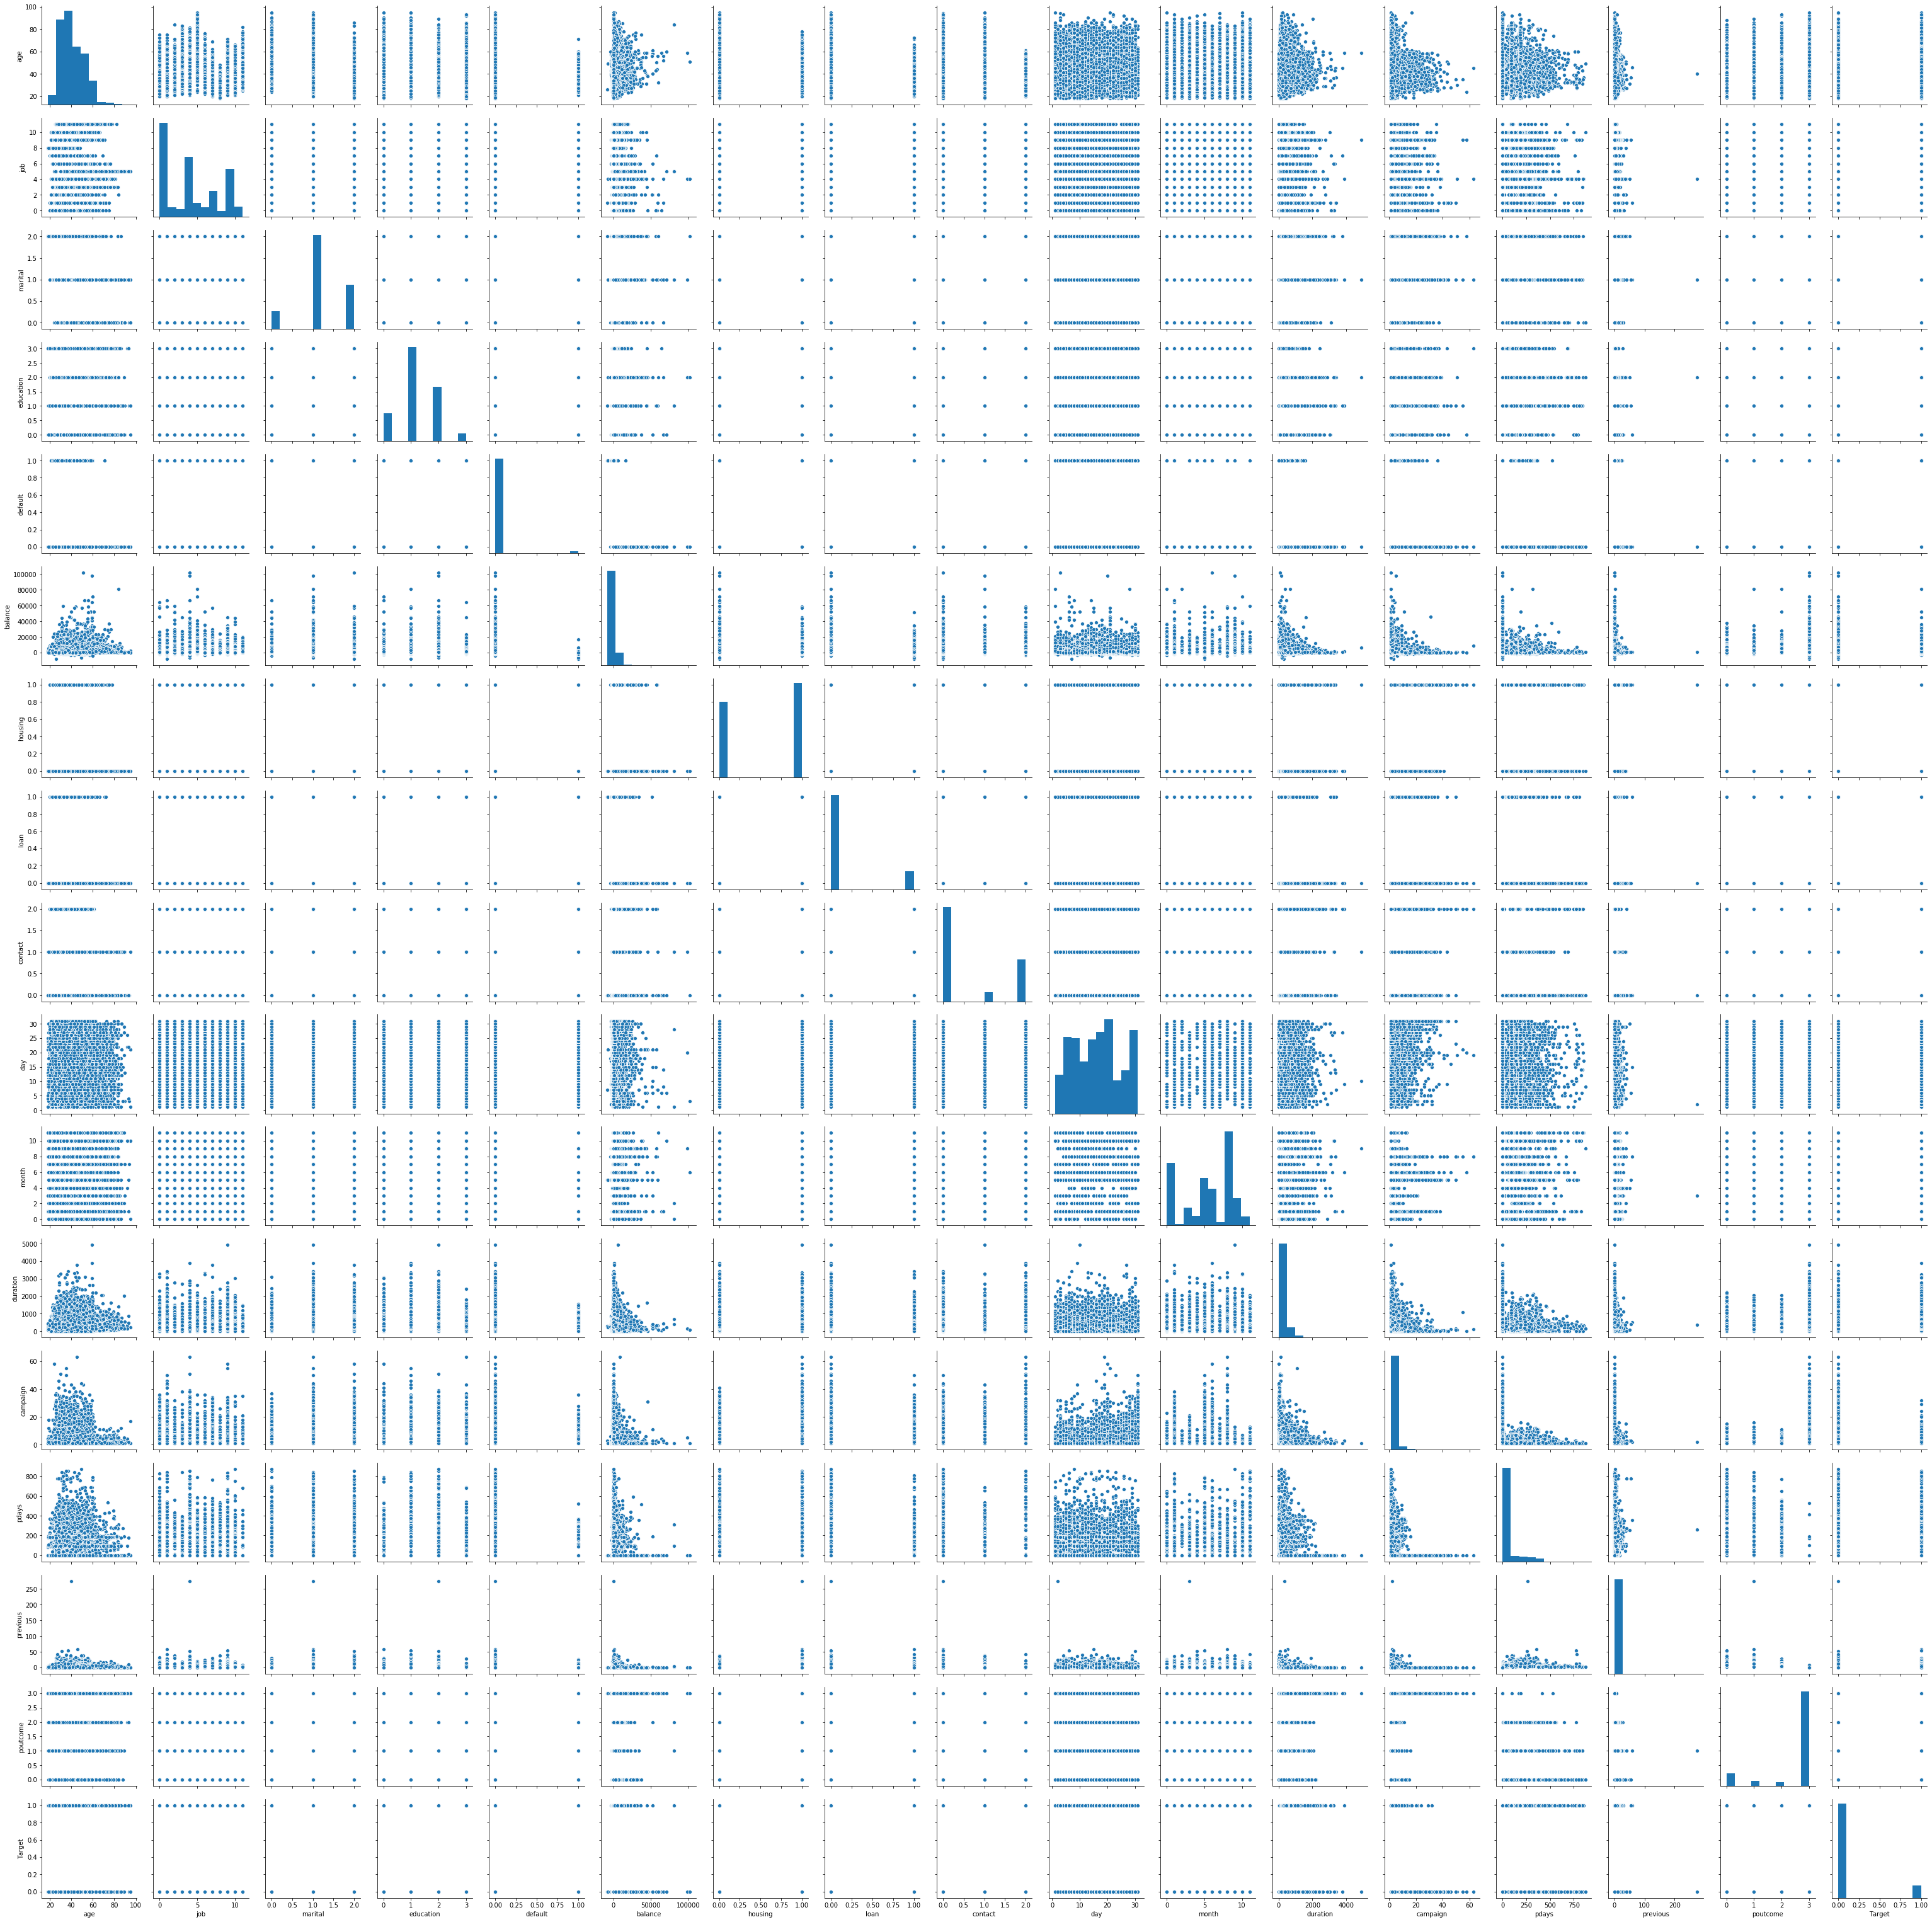

In [18]:
sns.pairplot(bank.iloc[:,:])
plot.show()

In [19]:
#Age :- Most of the people have age range between 30-40. There's slight difference between mean and median.
#Balance:- There are many people with negative balance ranging between (-700 to 0)
#Duration:- The duration ranges from 0 to 500. Also the mean>median which suggests it is positively skewed.
#Compaign:- Most of the people have been contacted 0 to 4 times.There are oultiers.
#pdays:- There are lot of negative values in this section.There are outliers
#previous:- Most of the people have been contacted for the first time for this compaign. No contacts where performed in majority cases before this compaign.There are outliers

In [20]:
#Understanding the categorical values 

print("Job:\n" ,bank["job"].unique(), "\n") 
print("marital\n",bank["marital"].unique(), "\n")
print("education\n",bank["education"].unique(), "\n")
print("default\n",bank["default"].unique(), "\n")
print("housing\n",bank["housing"].unique(), "\n")
print("loan\n",bank["loan"].unique(), "\n")
print("contact\n",bank["contact"].unique(), "\n")
print("month\n",bank["month"].unique(), "\n")
print("poutcome\n",bank["poutcome"].unique(), "\n")
print("Target\n",bank["Target"].unique(), "\n")

Job:
 [ 4  9  2  1 11  5  0  7  6 10  3  8] 

marital
 [1 2 0] 

education
 [2 1 3 0] 

default
 [0 1] 

housing
 [1 0] 

loan
 [0 1] 

contact
 [2 0 1] 

month
 [ 8  6  5  1 10  9  2  4  3  7  0 11] 

poutcome
 [3 0 1 2] 

Target
 [0 1] 



In [21]:
#Counting the no of unknown in the Job column
#Counting the no of unknown in the education column
#Counting the no of unknown in the poutcome column
#Counting the no of negative values in the pdays column

print("Job       - " ,bank[bank["job"]=="unknown"]["job"].count())
print("Education - " ,bank[bank["education"]=="unknown"]["education"].count())
print("Poutcome  - " ,bank[bank["poutcome"]=="unknown"]["poutcome"].count())
print("Pdays     - " ,bank[bank["pdays"]< 0]["pdays"].count())


Job       -  0
Education -  0
Poutcome  -  0
Pdays     -  36954


In [22]:
#Value count of the Job 
bank["job"].value_counts()

1     9732
4     9458
9     7597
0     5171
7     4154
5     2264
6     1579
2     1487
10    1303
3     1240
8      938
11     288
Name: job, dtype: int64

In [23]:
#Value count of the Job 
bank["education"].value_counts()

1    23202
2    13301
0     6851
3     1857
Name: education, dtype: int64

In [24]:
#value count of the education
bank["poutcome"].value_counts()

3    36959
0     4901
1     1840
2     1511
Name: poutcome, dtype: int64

In [25]:
#value count of the education
bank["pdays"].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

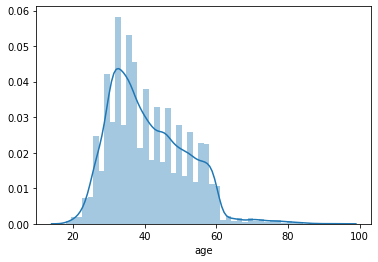

In [26]:
sns.distplot(bank["age"])
plot.show()

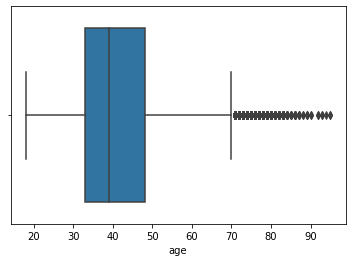

In [27]:
sns.boxplot(bank["age"])
plot.show()

In [28]:
# Calculating the outliers using the formula 

print('Ages below: ', bank['age'].quantile(q = 0.25) -
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

print('Ages above: ', bank['age'].quantile(q = 0.75) + 
                      1.5*(bank['age'].quantile(q = 0.75) - bank['age'].quantile(q = 0.25)), 'are outliers')

Ages below:  10.5 are outliers
Ages above:  70.5 are outliers


In [29]:
#Count of no of outliers in the datset

print('No of outliers:',bank[bank['age'] < 10.5]['age'].count())
print('No of outliers:',bank[bank['age'] > 70.5]['age'].count())

No of outliers: 0
No of outliers: 487


In [30]:
#Calculate the percentage of the outlier in the dataset

print('Percentage of Outliers are:', round(bank[bank['age'] > 70.5]['age'].count()*100/len(bank),2), '%')

Percentage of Outliers are: 1.08 %


In [31]:
#Calculate the coefficient of dispersion for age to get an insight of the disperson
# Coefficient of Variation = (Standard Deviation / Mean) * 100.
#If coeff < 15%, low dispersion
#If Coeff > 30% , high disperson

print("Coeff of dispersion is:", round(bank['age'].std()*100/bank['age'].mean(), 1))

Coeff of dispersion is: 25.9


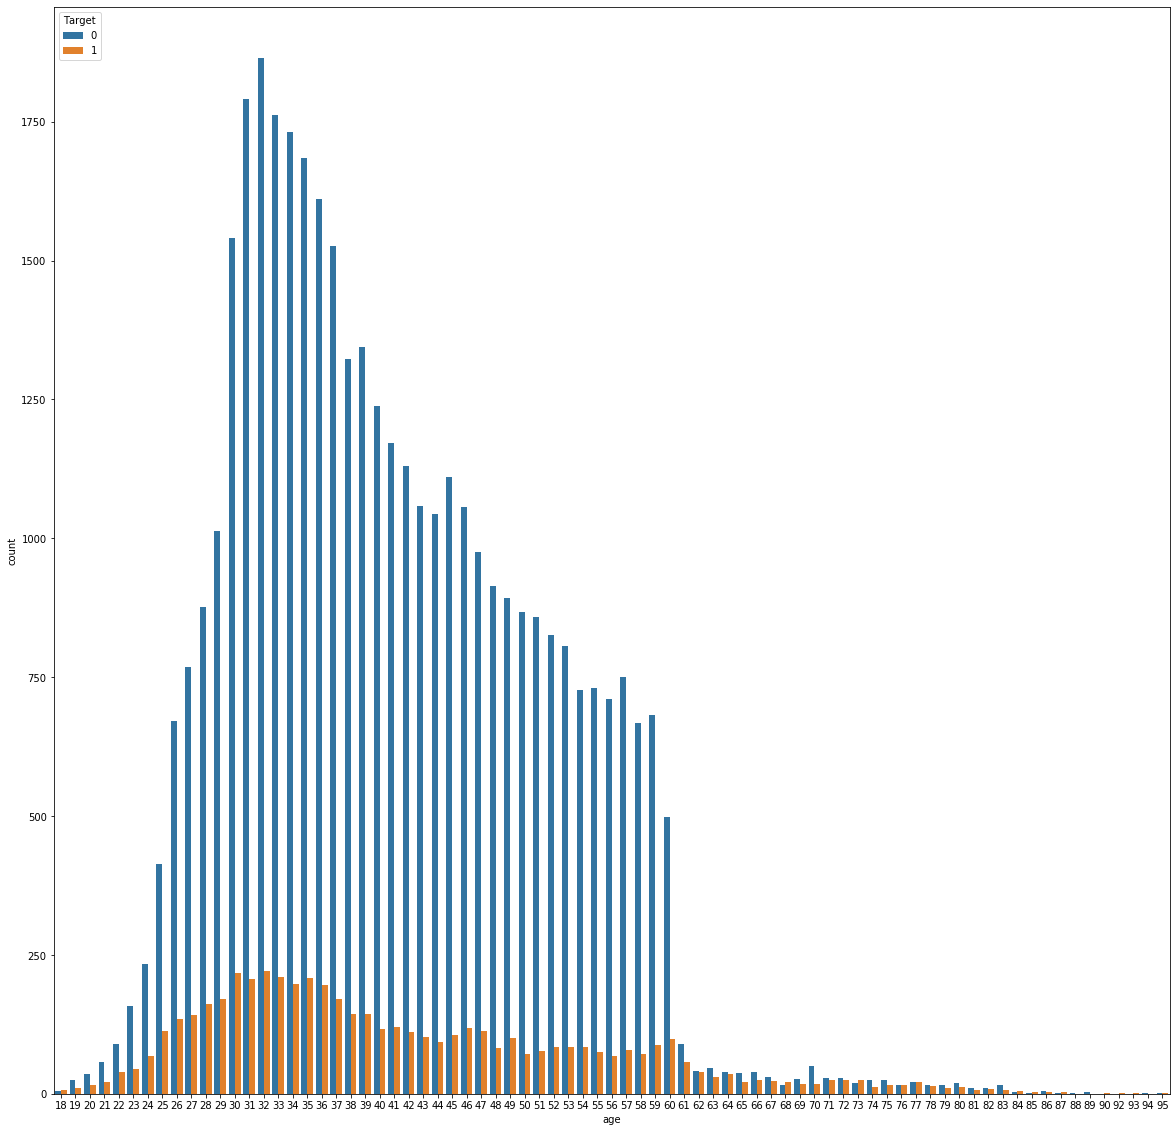

In [32]:
plot.figure(figsize=(20,20)) # this creates a figure 20 inch wide, 7 inch high
sns.countplot(x="age",data=bank,hue="Target")
plot.show()

In [33]:
#Age has somewhat high dispersion which means that there are people with different ages are the client of the bank.
#The percentage of the outliers are very less so we can ignore or fit the model with or withour them.
#There is no definite relation between the age and the target column. All we can say most of them are not interested in the term deposit

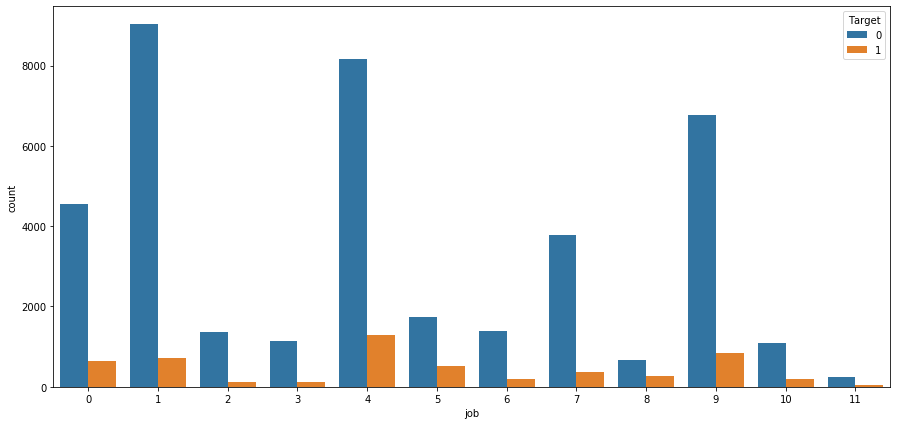

In [34]:
#Kind of job the clients of the bank have 
plot.figure(figsize=(15,7))
sns.countplot(x="job",data=bank, hue="Target")
plot.show()

In [35]:
#Since the no of unknown in the Job column is very less , we can drop the values

# Get names of indexes for which column Age has value 30
indexNames = bank[ bank['job'] == "unknown" ].index
# Delete these row indexes from dataFrame
bank.drop(indexNames , inplace=True)

In [36]:
#Confirming the unknow values are dropped
print("Job:\n" ,bank["job"].unique())

Job:
 [ 4  9  2  1 11  5  0  7  6 10  3  8]


In [37]:
#There are more clients who work in management , blue-collar jobs and as a technician.
#Majority of clients irrespective of their profession have more likely not subscribed to the term deposit.

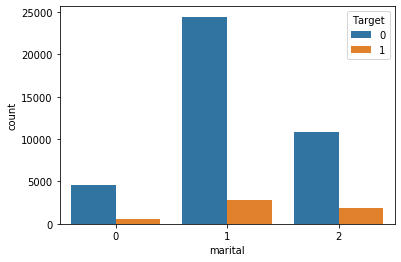

In [38]:
sns.countplot(x="marital",data=bank, hue="Target")
plot.show()

In [39]:
#There are more no of clients who are married
#There's no definite pattern which can derived wrt target variable.Majority of the clients irrespective of their marital status have not taken the term deposit.

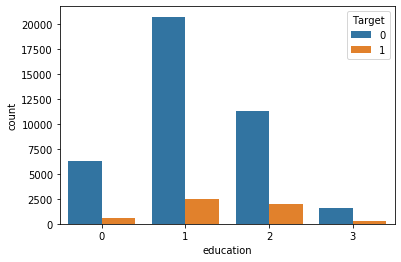

In [40]:
sns.countplot(x="education",data=bank, hue="Target")
plot.show()

In [41]:
#There are more clients with the secondary education.
#Education has no impact on the target as most of the people are interested in term deposit irrespective of their educational qualification

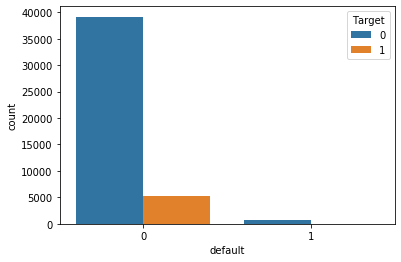

In [42]:
sns.countplot(x="default",data=bank, hue="Target")
plot.show()

In [43]:
#There are more clients with the no default credit amount.
#All the clients with no or yes default credit amount have not subscribed to the term deposit.

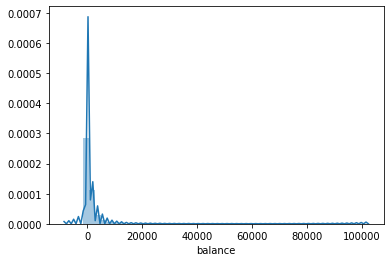

In [44]:
sns.distplot(bank["balance"])
plot.show()

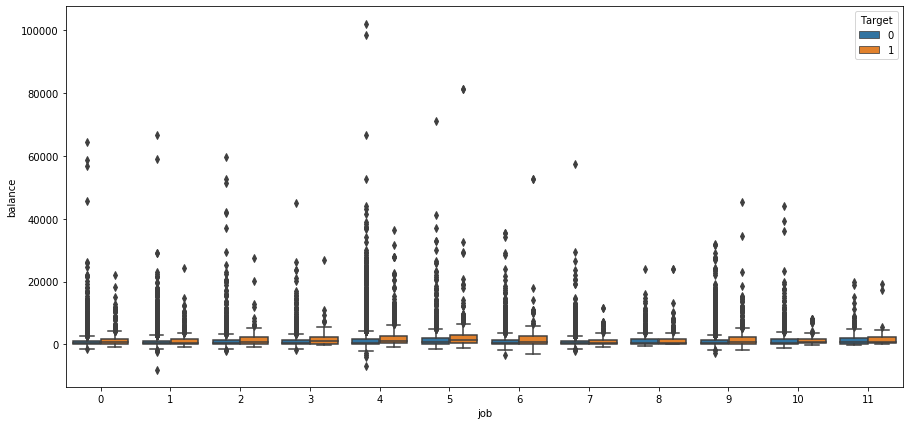

In [45]:
#Influence of job and balance on the Target variable
plot.figure(figsize=(15,7))
sns.boxplot(x='job',y='balance',hue='Target',data=bank)
plot.show()

In [46]:
# Calculating the outliers using the formula 

print('Balance below: ', bank['balance'].quantile(q = 0.25) -
                      1.5*(bank['balance'].quantile(q = 0.75) - bank['balance'].quantile(q = 0.25)), 'are outliers')

print('Balance above: ', bank['balance'].quantile(q = 0.75) + 
                      1.5*(bank['balance'].quantile(q = 0.75) - bank['balance'].quantile(q = 0.25)), 'are outliers')

Balance below:  -1962.0 are outliers
Balance above:  3462.0 are outliers


In [47]:
#Count of no of outliers in the datset

print('No of outliers:',bank[bank['balance'] < -1962]['balance'].count())
print('No of outliers:',bank[bank['balance'] > 3462]['balance'].count())

No of outliers: 17
No of outliers: 4712


In [48]:
print('Percentage of Outliers are:', round(bank[bank['balance'] > 3462]['balance'].count()*100/len(bank),2), '%')

Percentage of Outliers are: 10.42 %


In [49]:
#No of negative credit balance clients and it's percentage

neg_values=bank[bank["balance"]< 0]["balance"].count()
print(neg_values)
total =len(bank)
neg_values_percentage=(neg_values/total)*100
print(neg_values_percentage)

3766
8.329831235761208


In [50]:
#We have around 8.3 % of the clients with negative balance.
#Most of them have balance between -500 to 1000
#The people with high balance are around 10.42 % which can be considered as an potential client to sell term deposit.
#The management and retired clients

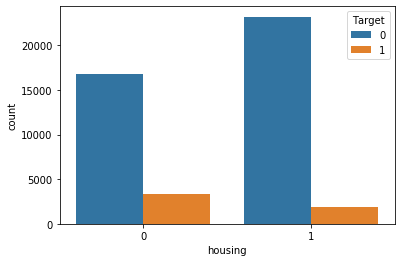

In [51]:
sns.countplot(x="housing",data=bank, hue="Target")
plot.show()

In [52]:
#The percentage of clients with no housing have shown more interest in the term deposit as compared to clients with housing .
#The total no of clients with no term deposit are more irrespective of the housing.

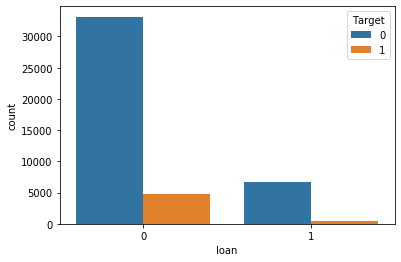

In [53]:
sns.countplot(x="loan",data=bank, hue="Target")
plot.show()

In [54]:
#The percentage of clients with no loan have shown more interest in the term deposit as compared with clients with loan.
#The total no of clients with no term deposit are more irrespective of the loan.

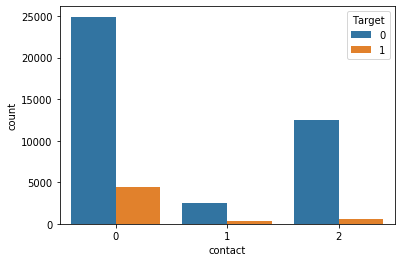

In [55]:
sns.countplot(x="contact",data=bank, hue="Target")
plot.show()

In [56]:
#The percentage of the clients contacted via cellular is more than others.
#4 % of data contains unknown values .

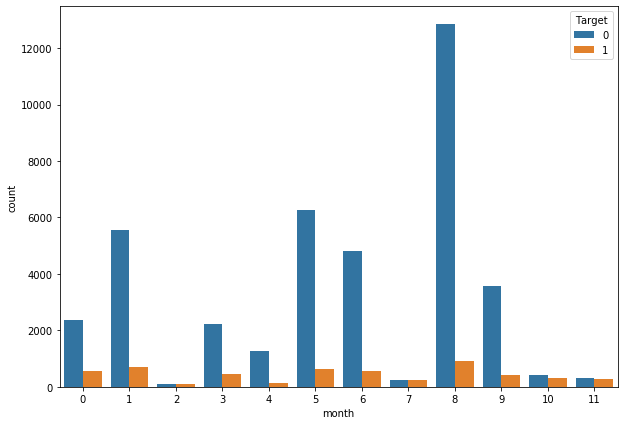

In [57]:
plot.figure(figsize=(10,7))
sns.countplot(x="month",data=bank, hue="Target")
plot.show()

In [58]:
#Most of the clients were last contacted in the month of the May.
#Contact month has nothing to do with the target as most of them are not interested in term deposit.

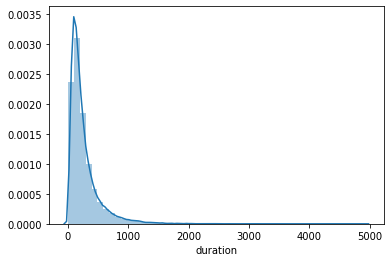

In [59]:
sns.distplot(bank["duration"])
plot.show()

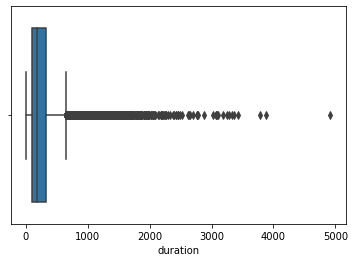

In [60]:
sns.boxplot(bank["duration"])
plot.show()

In [61]:
print('Duration calls above: ', bank['duration'].quantile(q = 0.75) + 
                      1.5*(bank['duration'].quantile(q = 0.75) - bank['duration'].quantile(q = 0.25)), 'are outliers')

Duration calls above:  643.0 are outliers


In [62]:
#Calculating the no of outliers 

print('Numerber of outliers: ', bank[bank['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank))
#Outliers in %
print('Outliers are:', round(bank[bank['duration'] > 644.5]['duration'].count()*100/len(bank),2), '%')

Numerber of outliers:  3222
Number of clients:  45211
Outliers are: 7.13 %


In [63]:
#If the call duration is between 0 to 7 seconds then the person has not subscribed to the term deposit

bank[bank["duration"]==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
6424,53,4,1,0,0,351,1,0,2,27,8,0,4,-1,0,3,0
22937,35,9,1,1,0,5535,0,0,0,26,1,0,15,-1,0,3,0
36425,31,2,1,1,0,162,1,1,0,11,8,0,2,-1,0,3,0


In [64]:
print("Coeff of dispersion is:", round(bank['duration'].std()*100/bank['duration'].mean(), 1))

Coeff of dispersion is: 99.8


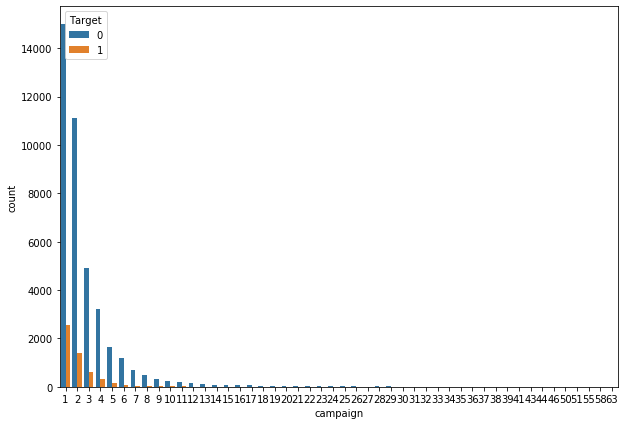

In [65]:
plot.figure(figsize=(10,7))
sns.countplot(x="campaign",data=bank, hue="Target")
plot.show()

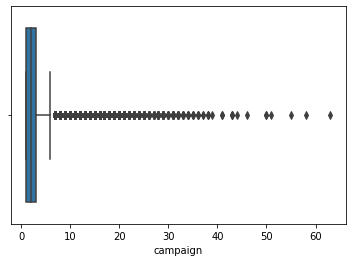

In [66]:
sns.boxplot(bank["campaign"])
plot.show()

In [67]:
#Most of the people have been contacted 0 to 4 times during this compaign.
#There are few ouliers but they can be ignored .

In [68]:
#Calculating  the percentage of  negative values in the pdays column
neg_pdays= bank[bank["pdays"]< 0]["pdays"].count()
total=len(bank)
percent_neg_pdays=(neg_pdays*100)/total
print(percent_neg_pdays)

81.73674548229413


In [69]:
#82 % of P days value are negative

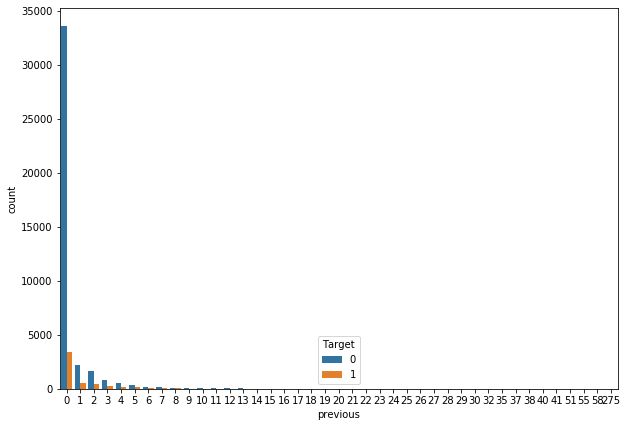

In [70]:
plot.figure(figsize=(10,7))
sns.countplot(x="previous",data=bank, hue="Target")
plot.show()

In [71]:
#Most of the client were not contacted during the previous compaign

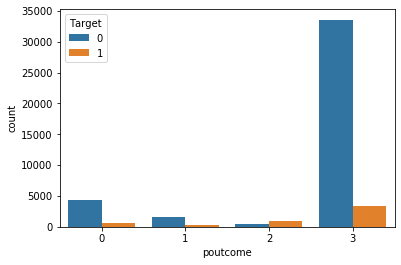

In [72]:
sns.countplot(x="poutcome",data=bank, hue="Target")
plot.show()

In [73]:
#82% of the data, don't know the outcome of the previous compaign
#If the outcome of the previous compaign was successfull , then the percentage of it's success is more in current compaign.

In [74]:
X = bank.drop("Target" , axis=1)
y = bank["Target"]   # select all rows and the 17 th column which is the classification "Yes", "No"
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [75]:
#Feature scaling
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [76]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
logit =LogisticRegression()
logit.fit(X_train,np.ravel(y_train,order='C'))
y_pred=logit.predict(X_test)

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

[[11788   242]
 [ 1176   358]]
Accuracy: 0.8954585667944559


In [78]:
#instantiating decision tree as the default model

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [79]:
#KNN 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=22)
knn.fit(X_train, np.ravel(y_train,order='C'))
knnpred = knn.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, knnpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, knnpred))


[[11833   197]
 [ 1175   359]]
Accuracy: 0.898849896785609


In [80]:
#SVC
from sklearn.svm import SVC
svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, np.ravel(y_train,order='C'))
svcpred = svc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, svcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, svcpred))

[[10915  1115]
 [ 1093   441]]
Accuracy: 0.8372161604246535


In [81]:
#Naive bayes

from sklearn.naive_bayes import GaussianNB
gaussiannb= GaussianNB()
gaussiannb.fit(X_train, np.ravel(y_train,order='C'))
gaussiannbpred = gaussiannb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, gaussiannbpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, gaussiannbpred))

[[10593  1437]
 [  712   822]]
Accuracy: 0.8415659097611324


In [82]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, np.ravel(y_train,order='C'))
dtreepred = dtree.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, dtreepred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, dtreepred))

[[11163   867]
 [  802   732]]
Accuracy: 0.8769537009731643


In [83]:
#Ada Boosting
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dtree, n_estimators=60)
abcl=abcl.fit(X_train,np.ravel(y_train,order='C'))
abcl_pred=abcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, abcl_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, abcl_pred))

[[11187   843]
 [  791   743]]
Accuracy: 0.8795340607490416


In [84]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entopy,gini
rfc.fit(X_train, np.ravel(y_train,order='C'))
rfcpred = rfc.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, rfcpred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, rfcpred))


[[11673   357]
 [  893   641]]
Accuracy: 0.907844293718667


In [85]:
new_bank_df=bank.pop("Target")

In [86]:
#Bagging classfier

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=60, max_samples=.7 , oob_score=True)

bgcl = bgcl.fit(bank, new_bank_df)
print(bgcl.oob_score_)              



0.9046913361792485


In [87]:
#Gradient boosting

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.09, max_depth=5)
gbcl = gbcl.fit(X_train,np.ravel(y_train,order='C'))
test_pred = gbcl.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, test_pred)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, test_pred))

[[11668   362]
 [  889   645]]
Accuracy: 0.907770569153642


In [88]:
import Xgboost as xgb 
from xgb import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, np.ravel(y_train,order='C'))
xgbprd = xgb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, xgbprd)
print(cnf_matrix)
print("Accuracy:",metrics.accuracy_score(y_test, xgbprd))

ModuleNotFoundError: No module named 'Xgboost'

In [89]:
from sklearn.metrics import classification_report

print('Logistic  Reports\n',classification_report(y_test, y_pred))
print('KNN Reports\n',classification_report(y_test, knnpred))
print('SVC Reports\n',classification_report(y_test, svcpred))
print('Naive BayesReports\n',classification_report(y_test, gaussiannbpred))
print('Decision Tree Reports\n',classification_report(y_test, dtreepred))
print('Ada Boosting\n',classification_report(y_test, abcl_pred))
print('Random Forests Reports\n',classification_report(y_test, rfcpred))
print('Bagging Clasifier',bgcl.oob_score_) 
print('Gradient Boosting',classification_report(y_test, test_pred))
print('XGBoosting\n',classification_report(y_test, xgbprd))

Logistic  Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12030
           1       0.60      0.23      0.34      1534

    accuracy                           0.90     13564
   macro avg       0.75      0.61      0.64     13564
weighted avg       0.87      0.90      0.87     13564

KNN Reports
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     12030
           1       0.65      0.23      0.34      1534

    accuracy                           0.90     13564
   macro avg       0.78      0.61      0.64     13564
weighted avg       0.88      0.90      0.88     13564

SVC Reports
               precision    recall  f1-score   support

           0       0.91      0.91      0.91     12030
           1       0.28      0.29      0.29      1534

    accuracy                           0.84     13564
   macro avg       0.60      0.60      0.60     13564
weighted avg       0.84      

NameError: name 'xgbprd' is not defined

In [90]:
#Analyzing the results

##Looking at the confusion matrix which got from all the models, there are two types of wrong values :-

##False Positive:- It means that the client do not subscribed to the term deposit , but the model thinks he did. False Negative :- It means that the client subscribed to the term deposit , but the model said he don't. The False positive data is more dangerous as we will interpret wrong notion about the client but in reality he is not our client.

##The False negative data observations are not good but it can be ok , we have that client and in the future we'll discovery that in truth he's already our client.So, our objective here, is to find the best model by confusion matrix with the lowest False Positive as possible.

In [91]:
#Calculate the recall-specificity for all the algorithms

recall_logit=round(11586 /(11586 + 319),2)
print("Recall specificity for logistic regression :", recall_logit)
recall_Knn=round(11712/(11712 +193),2)
print("Recall specificity for KNN :", recall_Knn)
recall_SVC=round(11032/(11032+873),2)
print("Recall specificity for SVC :", recall_SVC)
recall_NB=round(10894/(10894+1011),2)
print("Recall specificity for Naive Bayes:",recall_NB)
recall_DT=round(11010/(11010+895),2)
print("Recall specificity for Decision Tree:",recall_DT)
recall_AB=round(11012/(11012+893),2)
print("Recall specificity for AdaBoosting:",recall_AB)
recall_RF=round(11581/(11581+324),2)
print("Recall specificity for random forest:",recall_RF)
recall_GB=round(11545/(11545+360),2)
print("Recall specificity for Gradient Boost:",recall_GB)
recall_XGBoost=round(11589/(11589+316),2)
print("Recall specificity for XG Boost:",recall_XGBoost)

Recall specificity for logistic regression : 0.97
Recall specificity for KNN : 0.98
Recall specificity for SVC : 0.93
Recall specificity for Naive Bayes: 0.92
Recall specificity for Decision Tree: 0.92
Recall specificity for AdaBoosting: 0.92
Recall specificity for random forest: 0.97
Recall specificity for Gradient Boost: 0.97
Recall specificity for XG Boost: 0.97


In [92]:
#So the conclusion is KNN gave 98 % accurate which means 11712 client that didn't subscribed to the term deposit and 193 incorrect results

#Calculating metrics for choosen model (KNN)

In [93]:
#Recall
print(round(356 / (1216 + 356  ),2))

0.23


In [94]:
#Precision

print(round(356/(193+356),2))

0.65


In [95]:
#F1-Score

F1_Score= 2*0.65*0.23/(0.65+0.23)
print(F1_Score)

0.33977272727272734
